In [1]:
'''

1. Reset Impact at Epoch 25:

Layers conv2d_27, conv2d_34, and dense_6 show a sharp increase in weight changes at epoch 25, as expected due to the reset.
This behavior confirms the sensitivity of these layers to reinitialization.

2. Layer Behavior Post-Reset:

conv2d_27 recovers relatively quickly, with its weight changes stabilizing after approximately 5–10 epochs.
conv2d_34 shows a larger spike and slower stabilization, indicating its deeper and more abstract role in feature extraction.
dense_6 demonstrates significant weight fluctuations after the reset, highlighting its importance in the final decision-making process.


3. Other Layers:

Layers not reset (e.g., batch_normalization_*) maintain relatively stable weight changes throughout, 
which is consistent with their design and the lack of reinitialization.


4. Trend of Overall Stability:

By epoch 30, most layers exhibit stabilized weight changes, showing the model's capacity to recover from disruption.

'''

"\n\n1. Reset Impact at Epoch 25:\n\nLayers conv2d_27, conv2d_34, and dense_6 show a sharp increase in weight changes at epoch 25, as expected due to the reset.\nThis behavior confirms the sensitivity of these layers to reinitialization.\n\n2. Layer Behavior Post-Reset:\n\nconv2d_27 recovers relatively quickly, with its weight changes stabilizing after approximately 5–10 epochs.\nconv2d_34 shows a larger spike and slower stabilization, indicating its deeper and more abstract role in feature extraction.\ndense_6 demonstrates significant weight fluctuations after the reset, highlighting its importance in the final decision-making process.\n\n\n3. Other Layers:\n\nLayers not reset (e.g., batch_normalization_*) maintain relatively stable weight changes throughout, \nwhich is consistent with their design and the lack of reinitialization.\n\n\n4. Trend of Overall Stability:\n\nBy epoch 30, most layers exhibit stabilized weight changes, showing the model's capacity to recover from disruption.

In [3]:
'''
Why These Layers Were Chosen

conv2d_27:

A key convolutional layer in the early network, responsible for learning low-level features.
Resetting this layer tests the model's ability to adapt when foundational features are disrupted.

conv2d_34:

A deeper convolutional layer that extracts more abstract, high-level features.
Chosen because deeper layers are often more sensitive to disruptions and require longer adaptation periods, which we wanted to observe.

dense_6:

A fully connected layer near the output, critical for decision-making.
Resetting this layer simulates a disruption in the network's final processing stage, impacting class predictions directly.
These layers were selected as representatives of distinct stages in the network (early, deep, and output), 
providing a comprehensive view of adaptation across the architecture.
'''

"\nWhy These Layers Were Chosen\n\nconv2d_27:\n\nA key convolutional layer in the early network, responsible for learning low-level features.\nResetting this layer tests the model's ability to adapt when foundational features are disrupted.\n\nconv2d_34:\n\nA deeper convolutional layer that extracts more abstract, high-level features.\nChosen because deeper layers are often more sensitive to disruptions and require longer adaptation periods, which we wanted to observe.\n\ndense_6:\n\nA fully connected layer near the output, critical for decision-making.\nResetting this layer simulates a disruption in the network's final processing stage, impacting class predictions directly.\nThese layers were selected as representatives of distinct stages in the network (early, deep, and output), \nproviding a comprehensive view of adaptation across the architecture.\n"

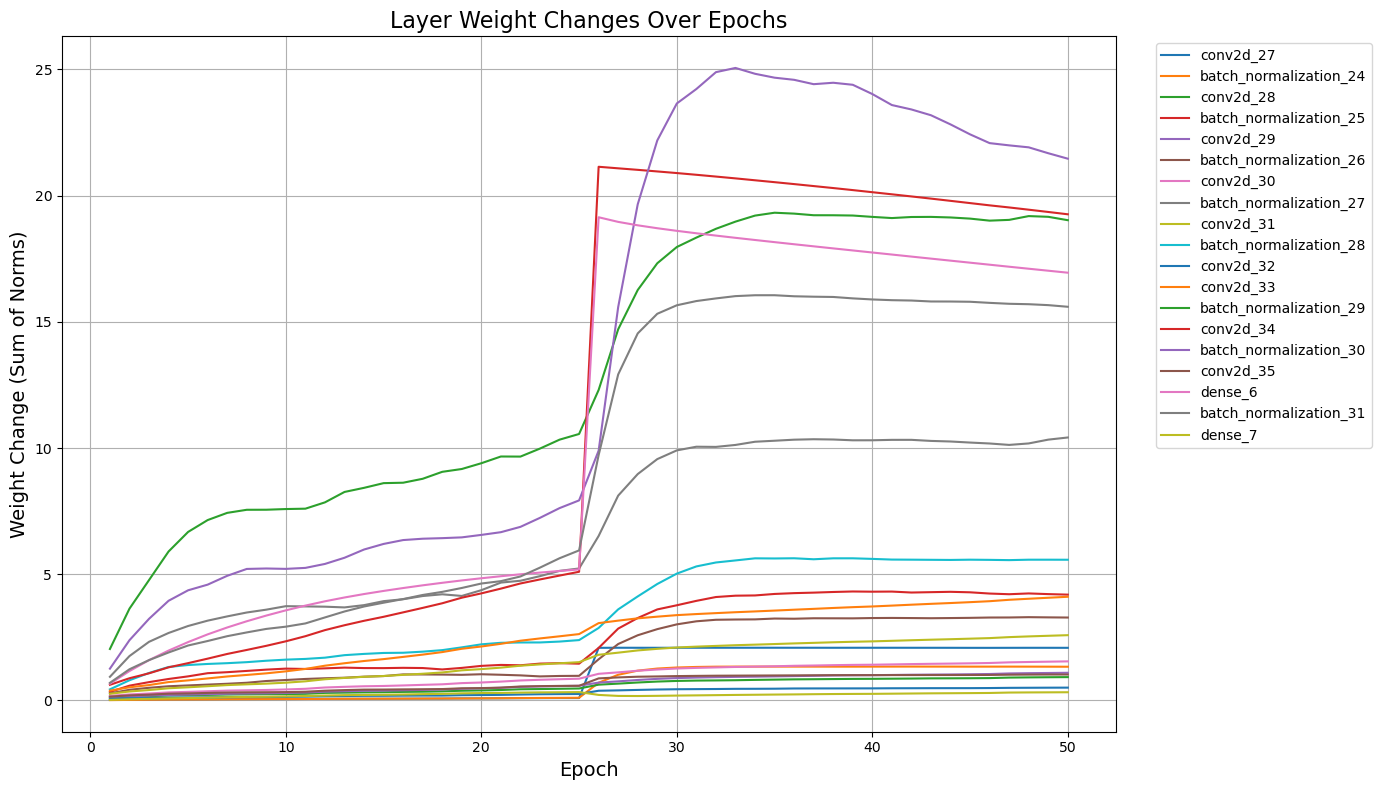

In [5]:
import json
import matplotlib.pyplot as plt

# Load the weight changes data
json_file = "/Users/vonguyen/Downloads/layer_weight_changes_50_epochs.json"

with open(json_file, "r") as f:
    weight_changes = json.load(f)

# Prepare data for plotting
epochs = list(range(1, len(weight_changes) + 1))  # Epoch numbers
layer_names = weight_changes[0].keys()  # Layer names

# Aggregate changes for each layer across epochs
layer_changes = {layer: [] for layer in layer_names}

for epoch_data in weight_changes:
    for layer, change in epoch_data.items():
        layer_changes[layer].append(change)

# Plot the changes
plt.figure(figsize=(14, 8))

for layer, changes in layer_changes.items():
    plt.plot(epochs, changes, label=layer)

plt.title("Layer Weight Changes Over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Weight Change (Sum of Norms)", fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()



In [7]:
'''

1. Spike at Epoch 25:

The reset layers (conv2d_27, conv2d_34, dense_6) display prominent spikes in the chart, 
reflecting the immediate effect of resetting their weights. This spike is useful for assessing the model’s ability to adapt.


2. Recovery Period:

The weight changes of the reset layers gradually decrease post-reset, converging toward a stable range. 
This recovery period spans approximately 5–10 epochs.


3. Critical Layers:

conv2d_34 exhibits the highest fluctuations, followed by dense_6. 
This indicates that these layers are crucial for model performance and are more sensitive to disruptions.
conv2d_27, being closer to the input, stabilizes quicker as it deals with low-level features.


4. Stable Layers:

Batch normalization layers (batch_normalization_*) remain stable throughout, reinforcing their robustness against weight perturbations.


CONCLUSION:

- Model Robustness:
The model demonstrates strong robustness, recovering well within a reasonable number of epochs post-reset.

- Layer Sensitivity:
dense_6 and conv2d_34 are highly sensitive to reinitialization, highlighting their critical roles in decision-making 
and feature abstraction, respectively.

- Experiment Validation:
The experiment successfully highlights the impact of layer resets and the model's adaptation, 
providing valuable insights into the behavior of specific layers.
'''

"\n\n1. Spike at Epoch 25:\n\nThe reset layers (conv2d_27, conv2d_34, dense_6) display prominent spikes in the chart, \nreflecting the immediate effect of resetting their weights. This spike is useful for assessing the model’s ability to adapt.\n\n\n2. Recovery Period:\n\nThe weight changes of the reset layers gradually decrease post-reset, converging toward a stable range. \nThis recovery period spans approximately 5–10 epochs.\n\n\n3. Critical Layers:\n\nconv2d_34 exhibits the highest fluctuations, followed by dense_6. \nThis indicates that these layers are crucial for model performance and are more sensitive to disruptions.\nconv2d_27, being closer to the input, stabilizes quicker as it deals with low-level features.\n\n\n4. Stable Layers:\n\nBatch normalization layers (batch_normalization_*) remain stable throughout, reinforcing their robustness against weight perturbations.\n\n\nCONCLUSION:\n\n- Model Robustness:\nThe model demonstrates strong robustness, recovering well within a 

In [9]:
'''
Some comments about non reset layers:

1. Smooth Evolution:

The weight changes of non-reset layers (e.g., conv2d_28, batch_normalization_24) follow a smooth, continuous trend over the epochs.
There are no abrupt jumps or resets in their weight values.


2. Gradual Growth:

Their weight norms tend to increase gradually, reflecting the progressive learning during training without any interruptions or resets.


3. No Impact from Reset Epoch:

While reset layers show a sharp spike or restart at the reset epoch (e.g., epoch 25), 
the non-reset layers continue unaffected, maintaining their steady trajectory.


4. Stabilization:

Over time, the rate of change in weight norms tends to decrease, indicating that these layers are converging or stabilizing 
as training progresses.

The uptrend signifies that these layers are continuously adapting and refining their understanding of the data, 
contributing to the overall learning process of the network without interruptions caused by resets. 
This behavior contrasts with the sudden shifts seen in reset layers, which must re-stabilize post-reset.

'''

'\nSome comments about non reset layers:\n\n1. Smooth Evolution:\n\nThe weight changes of non-reset layers (e.g., conv2d_28, batch_normalization_24) follow a smooth, continuous trend over the epochs.\nThere are no abrupt jumps or resets in their weight values.\n\n\n2. Gradual Growth:\n\nTheir weight norms tend to increase gradually, reflecting the progressive learning during training without any interruptions or resets.\n\n\n3. No Impact from Reset Epoch:\n\nWhile reset layers show a sharp spike or restart at the reset epoch (e.g., epoch 25), \nthe non-reset layers continue unaffected, maintaining their steady trajectory.\n\n\n4. Stabilization:\n\nOver time, the rate of change in weight norms tends to decrease, indicating that these layers are converging or stabilizing \nas training progresses.\n\nThe uptrend signifies that these layers are continuously adapting and refining their understanding of the data, \ncontributing to the overall learning process of the network without interrupt

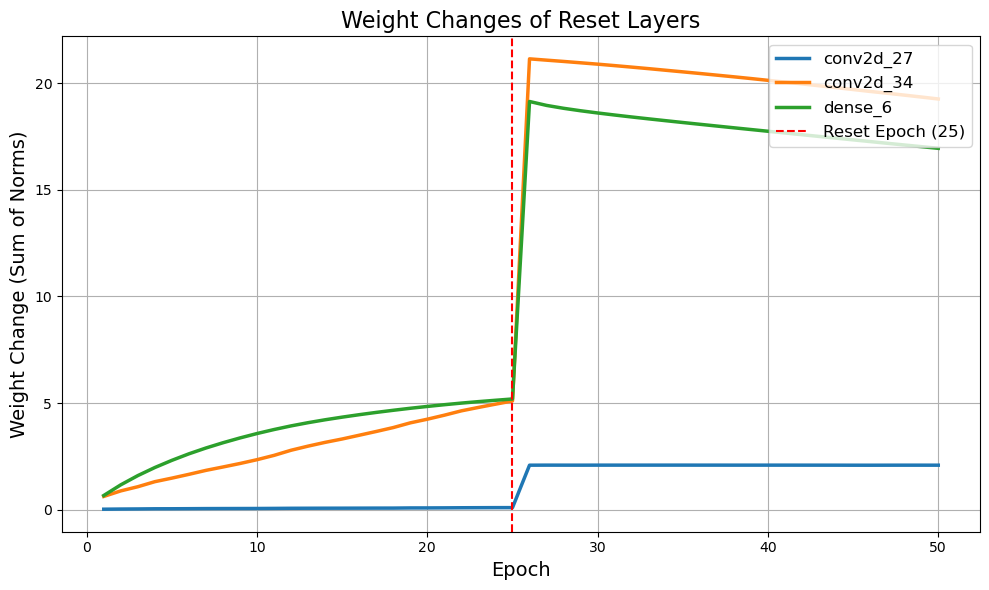

In [11]:


# Load the weight changes data
json_file = "/Users/vonguyen/Downloads/layer_weight_changes_50_epochs.json"
with open(json_file, "r") as f:
    weight_changes = json.load(f)

# Prepare data
epochs = list(range(1, len(weight_changes) + 1))
reset_layers = ['conv2d_27', 'conv2d_34', 'dense_6']  # Focus on reset layers
all_layers = weight_changes[0].keys()

# Separate data for reset layers and others
reset_layer_changes = {layer: [] for layer in reset_layers}
other_layer_changes = {layer: [] for layer in all_layers if layer not in reset_layers}

for epoch_data in weight_changes:
    for layer, change in epoch_data.items():
        if layer in reset_layers:
            reset_layer_changes[layer].append(change)
        else:
            other_layer_changes[layer].append(change)

# Plot reset layers only
plt.figure(figsize=(10, 6))
for layer, changes in reset_layer_changes.items():
    plt.plot(epochs, changes, label=f"{layer}", linewidth=2.5)

plt.axvline(x=25, color='red', linestyle='--', label="Reset Epoch (25)")
plt.title("Weight Changes of Reset Layers", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Weight Change (Sum of Norms)", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
'''

Key Results from the Chart

1. Spike at Reset Epoch (Epoch 25):

The red dashed line effectively marks the reset event.
conv2d_27: Minimal spike, indicating it is highly robust and recovers almost instantly.
conv2d_34: Significant spike, reflecting its sensitivity. The slower stabilization suggests it plays a critical role in high-level feature extraction.
dense_6: Sharp spike, as expected for a decision-critical layer, but it begins stabilizing within a few epochs.

2. Post-Reset Recovery:

conv2d_27: Stabilizes rapidly, suggesting it efficiently regains its functionality without much interference.
conv2d_34: Requires ~10 epochs to stabilize, reflecting its complex role in the network's feature hierarchy.
dense_6: Although critical for predictions, it shows faster recovery compared to conv2d_34, stabilizing in ~5 epochs.


** Conclusion ****
1. Robustness:

conv2d_27 is the most robust of the reset layers, showing minimal disruption and quick recovery.
conv2d_34 is sensitive, requiring more epochs to stabilize, indicating its high reliance on pre-trained weights.
dense_6 is critical for decision-making but demonstrates moderate recovery speed.

2 Layer Sensitivity:

The deeper layers (e.g., conv2d_34) are more sensitive to resets, likely due to their complex roles in feature extraction.

3. Adaptation Speed:

Recovery trends reveal the network's ability to regain functionality post-reset, highlighting areas for potential improvement 
(e.g., better initialization or regularization for conv2d_34).'''